In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
os.getcwd()

"C:\\Users\\chris\\OneDrive - Irwin's Safety and Industrial Labour Services Ltd\\Irwins\\python_scripts"

In [7]:
path = "C:\\Users\\chris\\OneDrive - Irwin's Safety and Industrial Labour Services Ltd\\Irwins\\output"

In [8]:
os.listdir(path)

['.ipynb_checkpoints',
 '2013_2016.csv',
 'cec_2018.csv',
 'daily.csv',
 'joffre_2018.csv',
 'SB_analysis.csv',
 'SB_Histograms.xlsx',
 'sheerness_2017.csv',
 'shep_2018.csv',
 'TA_database.csv',
 'TimeVsCode.xlsx',
 '~$TimeVsCode.xlsx']

In [10]:
alldata = pd.read_csv(path+'\\daily.csv')
alldata.head()

,csas_id,clean_date,TA_id,Number of Crews,days_from_start,csa_count,down_time,idle_time,nonwork_time,tool_time,wait_time,not working,working,PostStart,PreStart,total_time,tool_time_pct,pre_start_pct
0,7768548,2017-11-26,Sheerness_2017,4.0,11,35,0.0,0.716667,0.416667,7.266667,0.000000,1.133333,7.266667,0.633333,0.500000,8.400000,0.865079,0.441176
1,13131247,2018-06-11,Calgary Energy Centre_2018,2.0,16,8,0.0,0.733333,0.000000,1.166667,0.100000,0.833333,1.166667,0.583333,0.250000,2.000000,0.583333,0.300000
2,30978424,2018-03-11,Joffre_2018,10.0,8,5,0.0,0.716667,3.083333,4.700000,0.000000,3.800000,4.700000,3.366667,0.433333,8.500000,0.552941,0.114035
3,54396071,2017-11-23,Sheerness_2017,4.0,8,38,0.0,1.266667,0.083333,6.716667,0.000000,1.350000,6.716667,1.066667,0.283333,8.066667,0.832645,0.209877
4,55173638,2017-11-22,Sheerness_2017,1.0,7,34,0.0,0.266667,0.116667,4.266667,0.033333,0.416667,4.266667,0.333333,0.083333,4.683333,0.911032,0.200000


In [39]:
df = alldata[['Number of Crews','days_from_start','csa_count','pre_start_pct','tool_time_pct']]
df['tool_colour']=np.where(df['tool_time_pct']>0.6,'above average','below average')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number of Crews  799 non-null    float64
 1   days_from_start  799 non-null    int64  
 2   csa_count        799 non-null    int64  
 3   pre_start_pct    799 non-null    float64
 4   tool_time_pct    799 non-null    float64
 5   tool_colour      799 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 37.6+ KB


C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
features = ['Number of Crews','days_from_start','csa_count','pre_start_pct']
target = ['tool_time_pct']
x = df.loc[:,features].values
y = df.loc[:,target].values
x = StandardScaler().fit_transform(x)

In [41]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
pcs = model.fit_transform(x)
df['PCA1'] = pcs[:,0]
df['PCA2'] = pcs[:,1]
df.head()

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Number of Crews,days_from_start,csa_count,pre_start_pct,tool_time_pct,tool_colour,PCA1,PCA2
0,4.0,11,35,0.441176,0.865079,above average,0.402745,-0.931285
1,2.0,16,8,0.300000,0.583333,below average,-1.038218,-1.717771
2,10.0,8,5,0.114035,0.552941,below average,0.047934,-0.116317
3,4.0,8,38,0.209877,0.832645,above average,1.111621,-0.756791
4,1.0,7,34,0.200000,0.911032,above average,0.821122,-0.727641


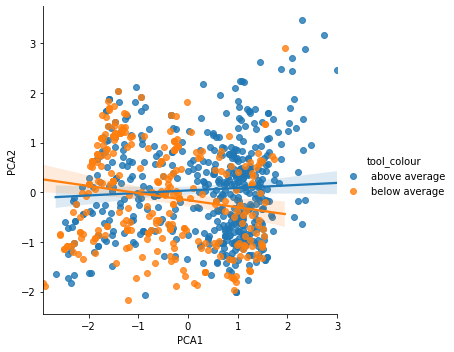

In [42]:
sns.lmplot("PCA1",'PCA2',hue='tool_colour',data=df)